<h1>Pivot Tables, Plots for PSNR, SSIM, Bhattacharrya Distances</h1>

In [4]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import imshow
from PIL import Image
from IPython.display import display
%matplotlib inline

os.chdir('/Users/catherine/Documents/GANs_Research/my_imps/research_models/evaluation')

In [5]:
import seaborn as sns
import pandas as pd

In [6]:
def table_to_df(csv, exp):
    df = pd.read_csv(csv)
    df.columns = ['num_label', 'value', 'file']
    df['exp'] = exp
    return df

<h1>PSNR</h1>

In [7]:
E_GANAp = table_to_df('Eurecom/E_GANA/psnr.csv', 'E_GANA')
E_GANBp = table_to_df('Eurecom/E_GANB/psnr.csv', 'E_GANB')

EA_GANAp = table_to_df('Eurecom/EA_GANA/psnr.csv', 'EA_GANA')
EA_GANBp = table_to_df('Eurecom/EA_GANB/psnr.csv', 'EA_GANB')
EA_GANCp = table_to_df('Eurecom/EA_GANC/psnr.csv', 'EA_GANC')
EA_GANDp = table_to_df('Eurecom/EA_GAND/psnr.csv', 'EA_GAND')

EAI_GANAp = table_to_df('Eurecom/EAI_GANA/psnr.csv', 'EAI_GANA')
EAI_GANBp = table_to_df('Eurecom/EAI_GANB/psnr.csv', 'EAI_GANB')
EAI_GANCp = table_to_df('Eurecom/EAI_GANC/psnr.csv', 'EAI_GANC')
EAI_GANDp = table_to_df('Eurecom/EAI_GAND/psnr.csv', 'EAI_GAND')

EI_GANAp = table_to_df('Eurecom/EI_GANA/psnr.csv', 'EI_GANA')
EI_GANBp = table_to_df('Eurecom/EI_GANB/psnr.csv', 'EI_GANB')
EI_GANCp = table_to_df('Eurecom/EI_GANC/psnr.csv', 'EI_GANC')
EI_GANDp = table_to_df('Eurecom/exp_e3_sm/psnr.csv', 'EI_GAND')



In [8]:
# Needs to be in the exact same order, since I'm going to append these three df's side by side
final_p = E_GANAp.append([E_GANBp,
                          EA_GANAp,
                          EA_GANBp,
                          EA_GANCp,
                          EA_GANDp,
                          EAI_GANAp,
                          EAI_GANBp,
                          EAI_GANCp,
                          EAI_GANDp,
                          EI_GANAp,
                          EI_GANBp,
                          EI_GANCp,
                          EI_GANDp
                        ])
final_p

,num_label,value,file,exp
0,0,29.215384,1_001_1_01_NN.bmp,E_GANA
1,1,31.640549,1_001_1_02_EH.bmp,E_GANA
2,2,31.856268,1_001_1_03_EA.bmp,E_GANA
3,3,31.520109,1_001_1_04_ES.bmp,E_GANA
4,4,31.887490,1_001_1_05_ESp.bmp,E_GANA
...,...,...,...,...
100,100,31.799938,1_036_1_17_LLU.bmp,EI_GAND
101,101,32.716018,1_036_1_18_LLR.bmp,EI_GAND
102,102,34.327982,1_036_1_19_LLL.bmp,EI_GAND
103,103,31.988035,1_036_1_20_LD.bmp,EI_GAND


In [9]:
final_p.dtypes

num_label      int64
value        float64
file          object
exp           object
dtype: object

In [10]:
conditions = [
    (final_p['num_label'] >=0) & (final_p['num_label'] <= 20),
    (final_p['num_label'] >=21) & (final_p['num_label'] <= 41),
    (final_p['num_label'] >=42) & (final_p['num_label'] <= 62),
    (final_p['num_label'] >=63) & (final_p['num_label'] <= 83),
    (final_p['num_label'] >=84) & (final_p['num_label'] <= 104)

]
choices = ["001", "002", "021", "031", "036"]
final_p['subject']= np.select(conditions, choices, default='null')
print(final_p)

     num_label      value                file      exp subject
0            0  29.215384   1_001_1_01_NN.bmp   E_GANA     001
1            1  31.640549   1_001_1_02_EH.bmp   E_GANA     001
2            2  31.856268   1_001_1_03_EA.bmp   E_GANA     001
3            3  31.520109   1_001_1_04_ES.bmp   E_GANA     001
4            4  31.887490  1_001_1_05_ESp.bmp   E_GANA     001
..         ...        ...                 ...      ...     ...
100        100  31.799938  1_036_1_17_LLU.bmp  EI_GAND     036
101        101  32.716018  1_036_1_18_LLR.bmp  EI_GAND     036
102        102  34.327982  1_036_1_19_LLL.bmp  EI_GAND     036
103        103  31.988035   1_036_1_20_LD.bmp  EI_GAND     036
104        104  30.172194   1_036_1_21_LR.bmp  EI_GAND     036

[1470 rows x 5 columns]


In [11]:
final_p

,num_label,value,file,exp,subject
0,0,29.215384,1_001_1_01_NN.bmp,E_GANA,001
1,1,31.640549,1_001_1_02_EH.bmp,E_GANA,001
2,2,31.856268,1_001_1_03_EA.bmp,E_GANA,001
3,3,31.520109,1_001_1_04_ES.bmp,E_GANA,001
4,4,31.887490,1_001_1_05_ESp.bmp,E_GANA,001
...,...,...,...,...,...
100,100,31.799938,1_036_1_17_LLU.bmp,EI_GAND,036
101,101,32.716018,1_036_1_18_LLR.bmp,EI_GAND,036
102,102,34.327982,1_036_1_19_LLL.bmp,EI_GAND,036
103,103,31.988035,1_036_1_20_LD.bmp,EI_GAND,036


In [12]:
psnr_mean = pd.pivot_table(final_p,index=["exp"],values=["value"])
psnr_mean

,value
exp,
EAI_GANA,30.085244
EAI_GANB,30.866249
EAI_GANC,31.184194
EAI_GAND,31.047264
EA_GANA,31.893156
EA_GANB,31.875523
EA_GANC,32.390927
EA_GAND,32.677930
EI_GANA,29.124283


In [13]:
psnr_mean_by_subject = pd.pivot_table(final_p,index=["subject", "exp"],values=["value"], aggfunc=[np.mean])
psnr_mean_by_subject 

mean
                      value
subject exp                
001     EAI_GANA  29.527573
        EAI_GANB  30.193748
        EAI_GANC  30.747512
        EAI_GAND  30.506081
        EA_GANA   31.525681
...                     ...
036     EI_GANB   32.066142
        EI_GANC   31.982032
        EI_GAND   32.123924
        E_GANA    31.689156
        E_GANB    31.828483

[70 rows x 1 columns]

In [14]:
def make_subjects(df):

    conditions = [
        (df['num_label'] >=0) & (df['num_label'] <= 20),
        (df['num_label'] >=21) & (df['num_label'] <= 41),
        (df['num_label'] >=42) & (df['num_label'] <= 62),
        (df['num_label'] >=63) & (df['num_label'] <= 83),
        (df['num_label'] >=84) & (df['num_label'] <= 104)

    ]
    choices = ["001", "002", "021", "031", "036"]
    df['subject']= np.select(conditions, choices, default='null')
    return df

<h1>SSIM</h1>

In [15]:
E_GANAs = table_to_df('Eurecom/E_GANA/ssim.csv', 'E_GANA')
E_GANBs = table_to_df('Eurecom/E_GANB/ssim.csv', 'E_GANB')

EA_GANAs = table_to_df('Eurecom/EA_GANA/ssim.csv', 'EA_GANA')
EA_GANBs = table_to_df('Eurecom/EA_GANB/ssim.csv', 'EA_GANB')
EA_GANCs = table_to_df('Eurecom/EA_GANC/ssim.csv', 'EA_GANC')
EA_GANDs = table_to_df('Eurecom/EA_GAND/ssim.csv', 'EA_GAND')

EAI_GANAs = table_to_df('Eurecom/EAI_GANA/ssim.csv', 'EAI_GANA')
EAI_GANBs = table_to_df('Eurecom/EAI_GANB/ssim.csv', 'EAI_GANB')
EAI_GANCs = table_to_df('Eurecom/EAI_GANC/ssim.csv', 'EAI_GANC')
EAI_GANDs = table_to_df('Eurecom/EAI_GAND/ssim.csv', 'EAI_GAND')

EI_GANAs = table_to_df('Eurecom/EI_GANA/ssim.csv', 'EI_GANA')
EI_GANBs = table_to_df('Eurecom/EI_GANB/ssim.csv', 'EI_GANB')
EI_GANCs = table_to_df('Eurecom/EI_GANC/ssim.csv', 'EI_GANC')
EI_GANDs = table_to_df('Eurecom/exp_e3_sm/ssim.csv', 'EI_GAND')

In [16]:
final_s = E_GANAs.append([E_GANBs,
                          EA_GANAs,
                          EA_GANBs,
                          EA_GANCs,
                          EA_GANDs,
                          EAI_GANAs,
                          EAI_GANBs,
                          EAI_GANCs,
                          EAI_GANDs,
                          EI_GANAs,
                          EI_GANBs,
                          EI_GANCs,
                          EI_GANDs
                        ])
final_s

,num_label,value,file,exp
0,0,0.863446,1_001_1_01_NN.bmp,E_GANA
1,1,0.901014,1_001_1_02_EH.bmp,E_GANA
2,2,0.915614,1_001_1_03_EA.bmp,E_GANA
3,3,0.913217,1_001_1_04_ES.bmp,E_GANA
4,4,0.910781,1_001_1_05_ESp.bmp,E_GANA
...,...,...,...,...
100,100,0.920521,1_036_1_17_LLU.bmp,EI_GAND
101,101,0.921648,1_036_1_18_LLR.bmp,EI_GAND
102,102,0.941568,1_036_1_19_LLL.bmp,EI_GAND
103,103,0.927871,1_036_1_20_LD.bmp,EI_GAND


In [17]:
final_s = make_subjects(final_s)

In [18]:
final_s

,num_label,value,file,exp,subject
0,0,0.863446,1_001_1_01_NN.bmp,E_GANA,001
1,1,0.901014,1_001_1_02_EH.bmp,E_GANA,001
2,2,0.915614,1_001_1_03_EA.bmp,E_GANA,001
3,3,0.913217,1_001_1_04_ES.bmp,E_GANA,001
4,4,0.910781,1_001_1_05_ESp.bmp,E_GANA,001
...,...,...,...,...,...
100,100,0.920521,1_036_1_17_LLU.bmp,EI_GAND,036
101,101,0.921648,1_036_1_18_LLR.bmp,EI_GAND,036
102,102,0.941568,1_036_1_19_LLL.bmp,EI_GAND,036
103,103,0.927871,1_036_1_20_LD.bmp,EI_GAND,036


In [19]:
ssim_mean = pd.pivot_table(final_s,index=["exp"],values=["value"], aggfunc=[np.mean])
ssim_mean

,mean
,value
exp,
EAI_GANA,0.913913
EAI_GANB,0.916568
EAI_GANC,0.917005
EAI_GAND,0.916135
EA_GANA,0.924098
EA_GANB,0.925907
EA_GANC,0.928480
EA_GAND,0.927698


In [20]:
ssim_mean_by_subject = pd.pivot_table(final_s,index=["subject", "exp"],values=["value"], aggfunc=[np.mean])
ssim_mean_by_subject

mean
                     value
subject exp               
001     EAI_GANA  0.908607
        EAI_GANB  0.911270
        EAI_GANC  0.912797
        EAI_GAND  0.911893
        EA_GANA   0.920407
...                    ...
036     EI_GANB   0.925723
        EI_GANC   0.922917
        EI_GAND   0.925143
        E_GANA    0.902945
        E_GANB    0.905828

[70 rows x 1 columns]

<h1>BHATT</h1>

In [21]:
E_GANAb = table_to_df('Eurecom/E_GANA/bhatt.csv', 'E_GANA')
E_GANBb = table_to_df('Eurecom/E_GANB/bhatt.csv', 'E_GANB')

EA_GANAb = table_to_df('Eurecom/EA_GANA/bhatt.csv', 'EA_GANA')
EA_GANBb = table_to_df('Eurecom/EA_GANB/bhatt.csv', 'EA_GANB')
EA_GANCb = table_to_df('Eurecom/EA_GANC/bhatt.csv', 'EA_GANC')
EA_GANDb = table_to_df('Eurecom/EA_GAND/bhatt.csv', 'EA_GAND')

EAI_GANAb = table_to_df('Eurecom/EAI_GANA/bhatt.csv', 'EAI_GANA')
EAI_GANBb = table_to_df('Eurecom/EAI_GANB/bhatt.csv', 'EAI_GANB')
EAI_GANCb = table_to_df('Eurecom/EAI_GANC/bhatt.csv', 'EAI_GANC')
EAI_GANDb = table_to_df('Eurecom/EAI_GAND/bhatt.csv', 'EAI_GAND')

EI_GANAb = table_to_df('Eurecom/EI_GANA/bhatt.csv', 'EI_GANA')
EI_GANBb = table_to_df('Eurecom/EI_GANB/bhatt.csv', 'EI_GANB')
EI_GANCb = table_to_df('Eurecom/EI_GANC/bhatt.csv', 'EI_GANC')
EI_GANDb = table_to_df('Eurecom/exp_e3_sm/bhatt.csv', 'EI_GAND')

In [22]:
final_b = E_GANAb.append([E_GANBb,
                          EA_GANAb,
                          EA_GANBb,
                          EA_GANCb,
                          EA_GANDb,
                          EAI_GANAb,
                          EAI_GANBb,
                          EAI_GANCb,
                          EAI_GANDb,
                          EI_GANAb,
                          EI_GANBb,
                          EI_GANCb,
                          EI_GANDb
                        ])
final_b

,num_label,value,file,exp
0,0,0.073833,1_001_1_01_NN.bmp,E_GANA
1,1,0.060694,1_001_1_02_EH.bmp,E_GANA
2,2,0.060517,1_001_1_03_EA.bmp,E_GANA
3,3,0.068061,1_001_1_04_ES.bmp,E_GANA
4,4,0.077764,1_001_1_05_ESp.bmp,E_GANA
...,...,...,...,...
100,100,0.064138,1_036_1_17_LLU.bmp,EI_GAND
101,101,0.056585,1_036_1_18_LLR.bmp,EI_GAND
102,102,0.057842,1_036_1_19_LLL.bmp,EI_GAND
103,103,0.060529,1_036_1_20_LD.bmp,EI_GAND


In [23]:
final_b = make_subjects(final_b)
final_b

,num_label,value,file,exp,subject
0,0,0.073833,1_001_1_01_NN.bmp,E_GANA,001
1,1,0.060694,1_001_1_02_EH.bmp,E_GANA,001
2,2,0.060517,1_001_1_03_EA.bmp,E_GANA,001
3,3,0.068061,1_001_1_04_ES.bmp,E_GANA,001
4,4,0.077764,1_001_1_05_ESp.bmp,E_GANA,001
...,...,...,...,...,...
100,100,0.064138,1_036_1_17_LLU.bmp,EI_GAND,036
101,101,0.056585,1_036_1_18_LLR.bmp,EI_GAND,036
102,102,0.057842,1_036_1_19_LLL.bmp,EI_GAND,036
103,103,0.060529,1_036_1_20_LD.bmp,EI_GAND,036


In [24]:
bhatt_mean = pd.pivot_table(final_b,index=["exp"],values=["value"], aggfunc=[np.mean])
bhatt_mean

,mean
,value
exp,
EAI_GANA,0.070329
EAI_GANB,0.069527
EAI_GANC,0.065397
EAI_GAND,0.058706
EA_GANA,0.039246
EA_GANB,0.040862
EA_GANC,0.042024
EA_GAND,0.041153


In [25]:
foo = bhatt_mean.reset_index()
foo

,exp,mean
,,value
0,EAI_GANA,0.070329
1,EAI_GANB,0.069527
2,EAI_GANC,0.065397
3,EAI_GAND,0.058706
4,EA_GANA,0.039246
5,EA_GANB,0.040862
6,EA_GANC,0.042024
7,EA_GAND,0.041153
8,EI_GANA,0.115000


In [26]:
foo.columns = foo.columns.droplevel(0)

In [27]:
foo

,,value
0,EAI_GANA,0.070329
1,EAI_GANB,0.069527
2,EAI_GANC,0.065397
3,EAI_GAND,0.058706
4,EA_GANA,0.039246
5,EA_GANB,0.040862
6,EA_GANC,0.042024
7,EA_GAND,0.041153
8,EI_GANA,0.115000
9,EI_GANB,0.060867


In [28]:
foo.columns = ['exp', 'bhatt']

In [29]:
foo

,exp,bhatt
0,EAI_GANA,0.070329
1,EAI_GANB,0.069527
2,EAI_GANC,0.065397
3,EAI_GAND,0.058706
4,EA_GANA,0.039246
5,EA_GANB,0.040862
6,EA_GANC,0.042024
7,EA_GAND,0.041153
8,EI_GANA,0.115000
9,EI_GANB,0.060867


In [30]:
bhatt_mean_by_subject = pd.pivot_table(final_b,index=["exp", "subject"],values=["value"], aggfunc=[np.mean])

<h1>Summary</h1>

Table of all the metrics per image

In [31]:
g = final_b.merge(final_s, on=["file", "exp", "num_label", "subject"])
g

,num_label,value_x,file,exp,subject,value_y
0,0,0.073833,1_001_1_01_NN.bmp,E_GANA,001,0.863446
1,1,0.060694,1_001_1_02_EH.bmp,E_GANA,001,0.901014
2,2,0.060517,1_001_1_03_EA.bmp,E_GANA,001,0.915614
3,3,0.068061,1_001_1_04_ES.bmp,E_GANA,001,0.913217
4,4,0.077764,1_001_1_05_ESp.bmp,E_GANA,001,0.910781
...,...,...,...,...,...,...
1465,100,0.064138,1_036_1_17_LLU.bmp,EI_GAND,036,0.920521
1466,101,0.056585,1_036_1_18_LLR.bmp,EI_GAND,036,0.921648
1467,102,0.057842,1_036_1_19_LLL.bmp,EI_GAND,036,0.941568
1468,103,0.060529,1_036_1_20_LD.bmp,EI_GAND,036,0.927871


In [32]:
final = g.merge(final_p, on=["file", "exp", "num_label", "subject"])
final

,num_label,value_x,file,exp,subject,value_y,value
0,0,0.073833,1_001_1_01_NN.bmp,E_GANA,001,0.863446,29.215384
1,1,0.060694,1_001_1_02_EH.bmp,E_GANA,001,0.901014,31.640549
2,2,0.060517,1_001_1_03_EA.bmp,E_GANA,001,0.915614,31.856268
3,3,0.068061,1_001_1_04_ES.bmp,E_GANA,001,0.913217,31.520109
4,4,0.077764,1_001_1_05_ESp.bmp,E_GANA,001,0.910781,31.887490
...,...,...,...,...,...,...,...
1465,100,0.064138,1_036_1_17_LLU.bmp,EI_GAND,036,0.920521,31.799938
1466,101,0.056585,1_036_1_18_LLR.bmp,EI_GAND,036,0.921648,32.716018
1467,102,0.057842,1_036_1_19_LLL.bmp,EI_GAND,036,0.941568,34.327982
1468,103,0.060529,1_036_1_20_LD.bmp,EI_GAND,036,0.927871,31.988035


In [33]:
final.columns = ['image_num', 'bhatt', 'image_file', 'exp', 'subj', 'ssim', 'psnr']
final = final[['image_num', 'image_file', 'subj', 'exp', 'bhatt', 'psnr', 'ssim']]
final

,image_num,image_file,subj,exp,bhatt,psnr,ssim
0,0,1_001_1_01_NN.bmp,001,E_GANA,0.073833,29.215384,0.863446
1,1,1_001_1_02_EH.bmp,001,E_GANA,0.060694,31.640549,0.901014
2,2,1_001_1_03_EA.bmp,001,E_GANA,0.060517,31.856268,0.915614
3,3,1_001_1_04_ES.bmp,001,E_GANA,0.068061,31.520109,0.913217
4,4,1_001_1_05_ESp.bmp,001,E_GANA,0.077764,31.887490,0.910781
...,...,...,...,...,...,...,...
1465,100,1_036_1_17_LLU.bmp,036,EI_GAND,0.064138,31.799938,0.920521
1466,101,1_036_1_18_LLR.bmp,036,EI_GAND,0.056585,32.716018,0.921648
1467,102,1_036_1_19_LLL.bmp,036,EI_GAND,0.057842,34.327982,0.941568
1468,103,1_036_1_20_LD.bmp,036,EI_GAND,0.060529,31.988035,0.927871


<h2>Visualization</h2>I want to build a scatterplot and mark a decision boundary for each image by its experiment. 

In [34]:
df_melt1 = pd.melt(final, id_vars =['exp', 'image_num'], value_vars =['bhatt', 'psnr', 'ssim'])
df_melt1

,exp,image_num,variable,value
0,E_GANA,0,bhatt,0.073833
1,E_GANA,1,bhatt,0.060694
2,E_GANA,2,bhatt,0.060517
3,E_GANA,3,bhatt,0.068061
4,E_GANA,4,bhatt,0.077764
...,...,...,...,...
4405,EI_GAND,100,ssim,0.920521
4406,EI_GAND,101,ssim,0.921648
4407,EI_GAND,102,ssim,0.941568
4408,EI_GAND,103,ssim,0.927871


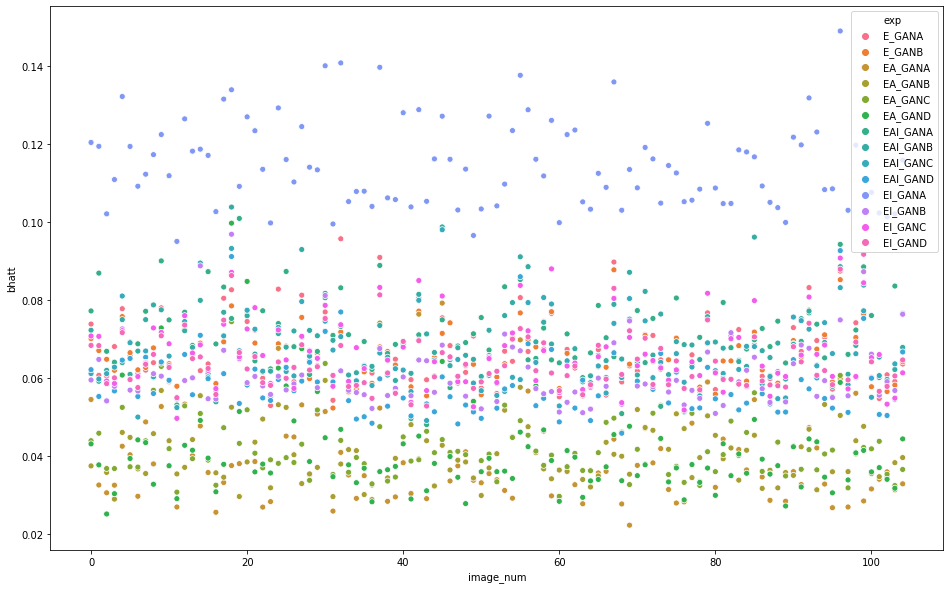

In [35]:
fig_dims = (16, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(x="image_num", y="bhatt", hue="exp",
                     data=final, ax=ax)

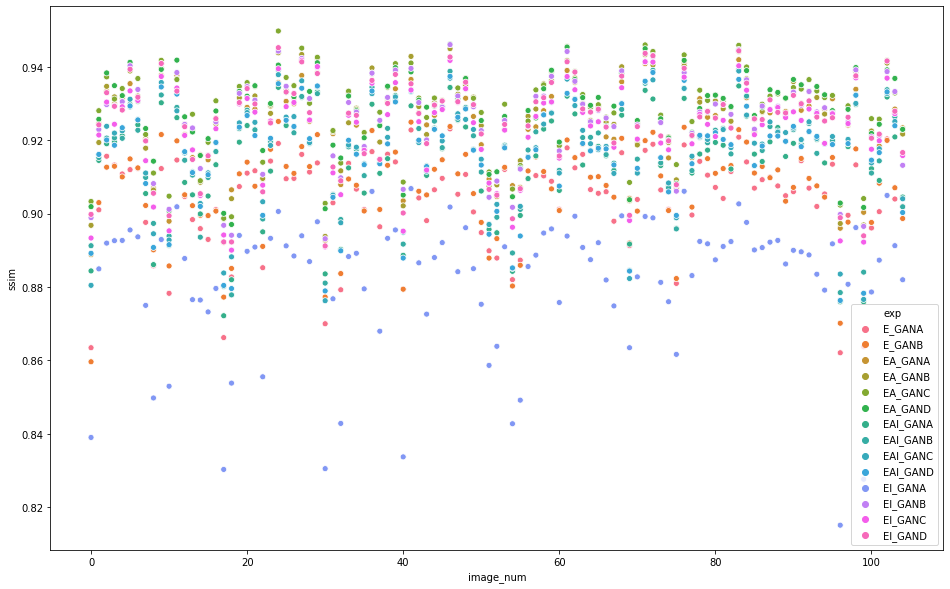

In [36]:
fig_dims = (16, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(x="image_num", y="ssim", hue="exp",
                     data=final, ax=ax)

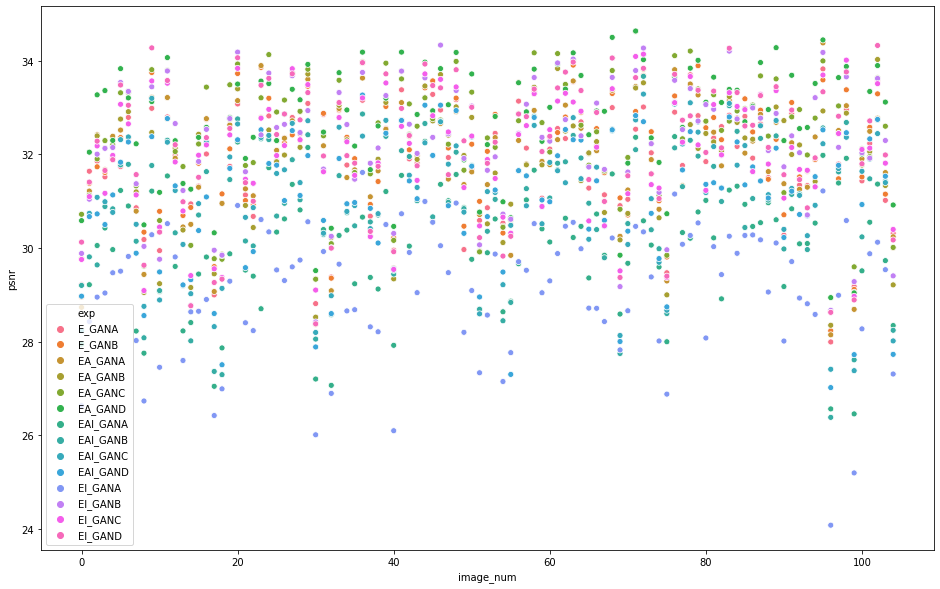

In [37]:
fig_dims = (16, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(x="image_num", y="psnr", hue="exp",
                     data=final, ax=ax)

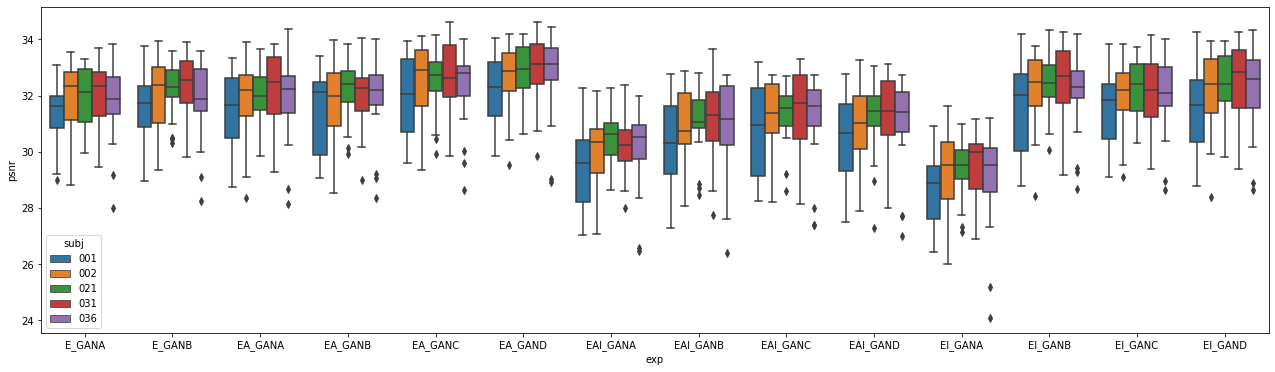

In [38]:
fig_dims = (22, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x="exp", y="psnr", hue="subj",
                     data=final, ax=ax)

In [39]:
final.head()

,image_num,image_file,subj,exp,bhatt,psnr,ssim
0,0,1_001_1_01_NN.bmp,001,E_GANA,0.073833,29.215384,0.863446
1,1,1_001_1_02_EH.bmp,001,E_GANA,0.060694,31.640549,0.901014
2,2,1_001_1_03_EA.bmp,001,E_GANA,0.060517,31.856268,0.915614
3,3,1_001_1_04_ES.bmp,001,E_GANA,0.068061,31.520109,0.913217
4,4,1_001_1_05_ESp.bmp,001,E_GANA,0.077764,31.887490,0.910781


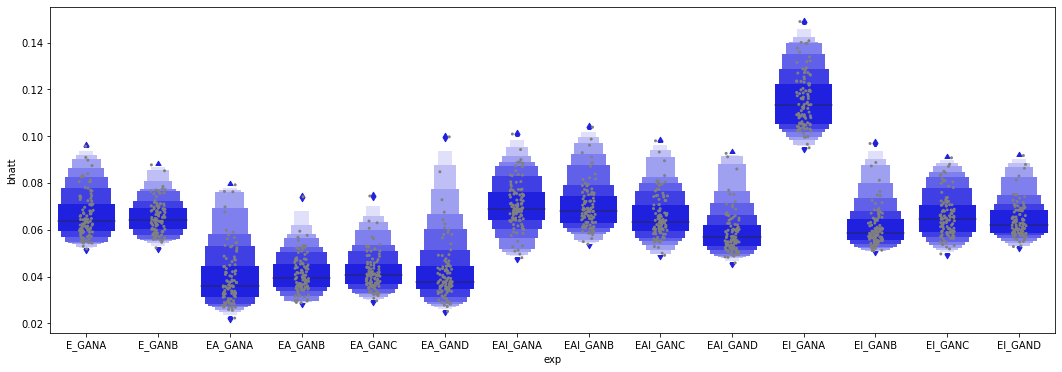

In [40]:
fig_dims = (18, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxenplot(x="exp", y="bhatt",
              color="b", scale="linear", data=final, ax=ax)
sns.stripplot(x="exp", y="bhatt", data=final,
                   size=3, color="gray", ax=ax)
#plt.savefig('Eurecom/plots/Eurecom_bhatt_boxenplot_0821.jpg')

In [41]:
final['bhatt'].std

<bound method Series.std of 0       0.073833
1       0.060694
2       0.060517
3       0.068061
4       0.077764
          ...   
1465    0.064138
1466    0.056585
1467    0.057842
1468    0.060529
1469    0.064630
Name: bhatt, Length: 1470, dtype: float64>

In [42]:
# standard deviation of bhatt distances
final['bhatt'].var

<bound method Series.var of 0       0.073833
1       0.060694
2       0.060517
3       0.068061
4       0.077764
          ...   
1465    0.064138
1466    0.056585
1467    0.057842
1468    0.060529
1469    0.064630
Name: bhatt, Length: 1470, dtype: float64>

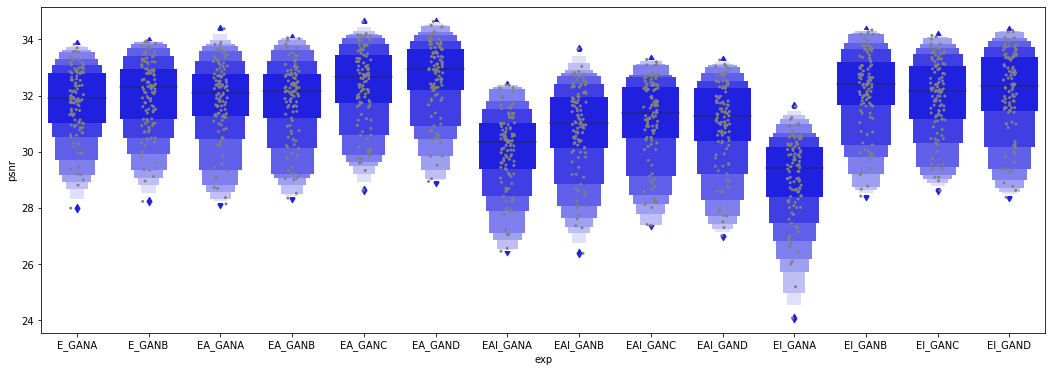

In [43]:
fig_dims = (18, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxenplot(x="exp", y="psnr", 
              color="b", scale="linear", data=final, ax=ax)
sns.stripplot(x="exp", y="psnr", data=final,
                   size=3, color="gray", ax=ax)
#plt.savefig('Eurecom/plots/Eurecom_psnr_boxenplot_0821.jpg')

In [44]:
final['psnr'].std

<bound method Series.std of 0       29.215384
1       31.640549
2       31.856268
3       31.520109
4       31.887490
          ...    
1465    31.799938
1466    32.716018
1467    34.327982
1468    31.988035
1469    30.172194
Name: psnr, Length: 1470, dtype: float64>

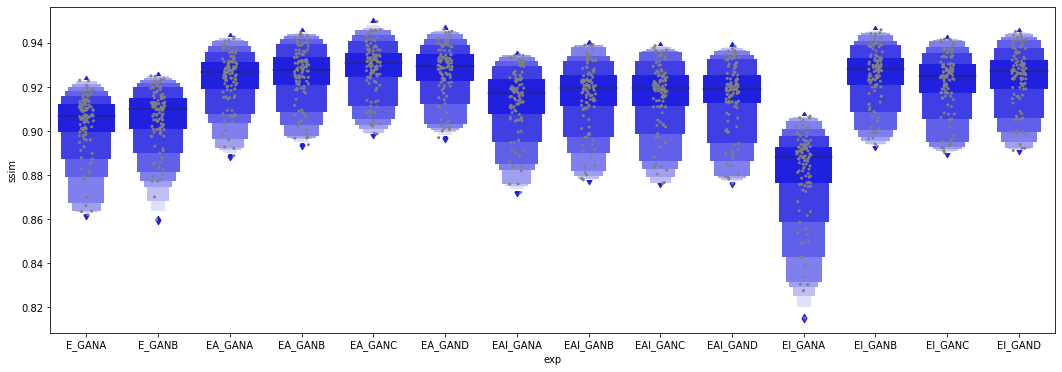

In [45]:
fig_dims = (18, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxenplot(x="exp", y="ssim",
              color="b", scale="linear", data=final, ax=ax)
sns.stripplot(x="exp", y="ssim", data=final,
                   size=3, color="gray", ax=ax)
#plt.savefig('Eurecom/plots/Eurecom_ssim_boxenplot_0821.jpg')

In [46]:
final['ssim'].std

<bound method Series.std of 0       0.863446
1       0.901014
2       0.915614
3       0.913217
4       0.910781
          ...   
1465    0.920521
1466    0.921648
1467    0.941568
1468    0.927871
1469    0.916616
Name: ssim, Length: 1470, dtype: float64>

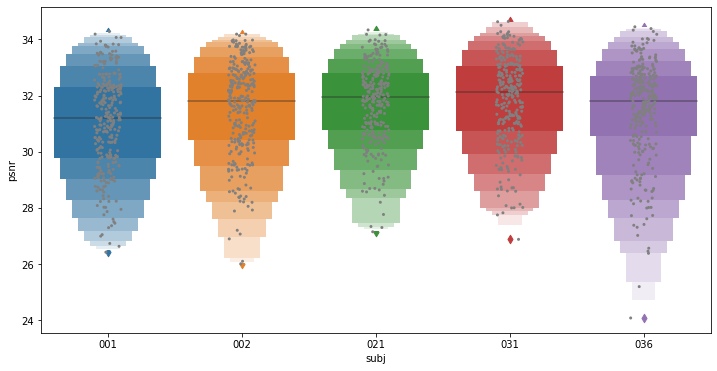

In [47]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxenplot(x="subj", y="psnr", scale="linear", data=final, ax=ax)
sns.stripplot(x="subj", y="psnr", data=final,
                   size=3, color="gray", ax=ax)
#plt.savefig('plots/subjects_psnr_boxenplot.pdf')

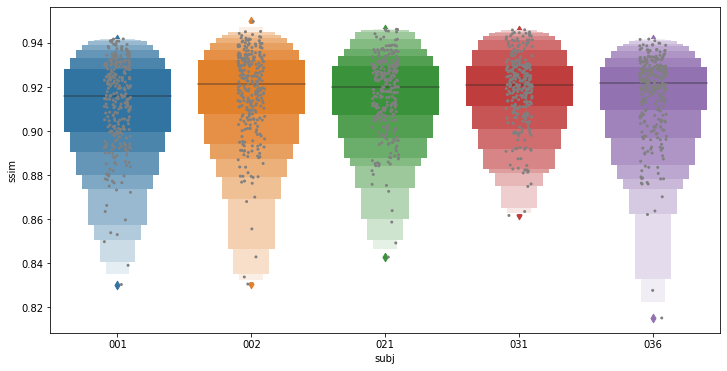

In [48]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxenplot(x="subj", y="ssim", scale="linear", data=final, ax=ax)
sns.stripplot(x="subj", y="ssim", data=final,
                   size=3, color="gray", ax=ax)
#plt.savefig('plots/subjects_ssim_boxenplot.pdf')

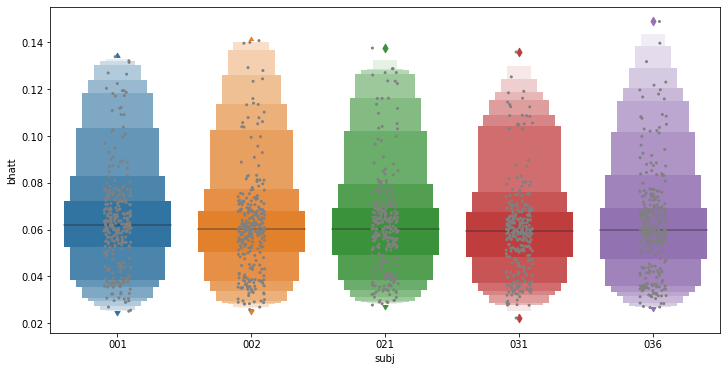

In [49]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxenplot(x="subj", y="bhatt", scale="linear", data=final, ax=ax)
sns.stripplot(x="subj", y="bhatt", data=final,
                   size=3, color="gray", ax=ax)
#plt.savefig('plots/subjects_bhatt_boxenplot.pdf')

<h2>Means</h2>

In [50]:
def format_means(df, metric):
    foo = df.reset_index()
    foo.columns = foo.columns.droplevel(0)
    foo.columns = ['exp', '{}'.format(metric)]
    return foo

In [51]:
moo = psnr_mean.reset_index()
#moo.columns = moo.columns.droplevel(0)
moo.columns = ['exp', 'psnr']
moo

,exp,psnr
0,EAI_GANA,30.085244
1,EAI_GANB,30.866249
2,EAI_GANC,31.184194
3,EAI_GAND,31.047264
4,EA_GANA,31.893156
5,EA_GANB,31.875523
6,EA_GANC,32.390927
7,EA_GAND,32.677930
8,EI_GANA,29.124283
9,EI_GANB,32.195805


In [52]:
hoo = ssim_mean.reset_index()
hoo.columns = hoo.columns.droplevel(0)
hoo.columns = ['exp', 'ssim']
hoo

,exp,ssim
0,EAI_GANA,0.913913
1,EAI_GANB,0.916568
2,EAI_GANC,0.917005
3,EAI_GAND,0.916135
4,EA_GANA,0.924098
5,EA_GANB,0.925907
6,EA_GANC,0.928480
7,EA_GAND,0.927698
8,EI_GANA,0.882146
9,EI_GANB,0.925557


In [53]:
a = hoo.merge(moo, on='exp')
a

,exp,ssim,psnr
0,EAI_GANA,0.913913,30.085244
1,EAI_GANB,0.916568,30.866249
2,EAI_GANC,0.917005,31.184194
3,EAI_GAND,0.916135,31.047264
4,EA_GANA,0.924098,31.893156
5,EA_GANB,0.925907,31.875523
6,EA_GANC,0.928480,32.390927
7,EA_GAND,0.927698,32.677930
8,EI_GANA,0.882146,29.124283
9,EI_GANB,0.925557,32.195805


In [54]:
foo

,exp,bhatt
0,EAI_GANA,0.070329
1,EAI_GANB,0.069527
2,EAI_GANC,0.065397
3,EAI_GAND,0.058706
4,EA_GANA,0.039246
5,EA_GANB,0.040862
6,EA_GANC,0.042024
7,EA_GAND,0.041153
8,EI_GANA,0.115000
9,EI_GANB,0.060867


<b>Means dataframe</b>

In [55]:
means = foo.merge(a, on='exp', how='right')
means

,exp,bhatt,ssim,psnr
0,EAI_GANA,0.070329,0.913913,30.085244
1,EAI_GANB,0.069527,0.916568,30.866249
2,EAI_GANC,0.065397,0.917005,31.184194
3,EAI_GAND,0.058706,0.916135,31.047264
4,EA_GANA,0.039246,0.924098,31.893156
5,EA_GANB,0.040862,0.925907,31.875523
6,EA_GANC,0.042024,0.928480,32.390927
7,EA_GAND,0.041153,0.927698,32.677930
8,EI_GANA,0.115000,0.882146,29.124283
9,EI_GANB,0.060867,0.925557,32.195805


In [56]:
means.to_csv('Eurecom/Eurecom_means_09132020.csv')

In [66]:
eurecom_fid = {'E_GANA': 54.13515234581777,
               'E_GANB': 53.08186705079433,
               'EI_GANA': 81.19494909035167,
               'EI_GANB': 103.53573204210574,
               'EI_GANC': 105.36056866173512,
               'EI_GAND': 108.87808330249995,
               'EA_GANA' : 83.13563019516296,
               'EA_GANB': 102.82729912486346,
               'EA_GANC': 102.75178294950399,
               'EA_GAND': 97.78787419616913,
               'EAI_GANA': 118.693629052512,
               'EAI_GANB': 125.01703306012396, 
               'EAI_GANC': 123.66932799873436, 
               'EAI_GAND': 124.41990208141806
    
}

In [67]:
mT = means.set_index('exp').T
foo = (pd.DataFrame.from_dict(eurecom_fid, orient='index')).T
eur_metrics = mT.append(foo)
eur_metrics = eur_metrics.rename(index={0: 'fid'})
eur_metrics

,EAI_GANA,EAI_GANB,EAI_GANC,EAI_GAND,EA_GANA,EA_GANB,EA_GANC,EA_GAND,EI_GANA,EI_GANB,EI_GANC,EI_GAND,E_GANA,E_GANB
bhatt,0.070329,0.069527,0.065397,0.058706,0.039246,0.040862,0.042024,0.041153,0.115000,0.060867,0.065837,0.063928,0.066020,0.065290
ssim,0.913913,0.916568,0.917005,0.916135,0.924098,0.925907,0.928480,0.927698,0.882146,0.925557,0.922176,0.924281,0.903670,0.906361
psnr,30.085244,30.866249,31.184194,31.047264,31.893156,31.875523,32.390927,32.677930,29.124283,32.195805,31.945098,32.150326,31.813761,32.047728
fid,118.693629,125.017033,123.669328,124.419902,83.135630,102.827299,102.751783,97.787874,81.194949,103.535732,105.360569,108.878083,54.135152,53.081867


In [68]:
eur_metrics.to_csv('Eurecom/Eurecom_mt_09152020.csv')

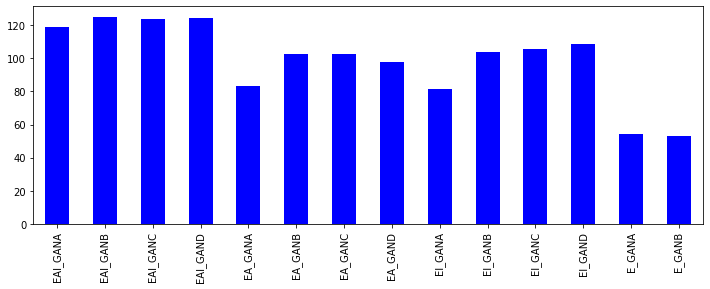

In [69]:
plt.subplots(figsize=(12,4))
(eur_metrics.T)['fid'].plot(kind='bar', color='blue')
plt.savefig('Eurecom/fid_0915.jpg', bbox_inches = "tight")

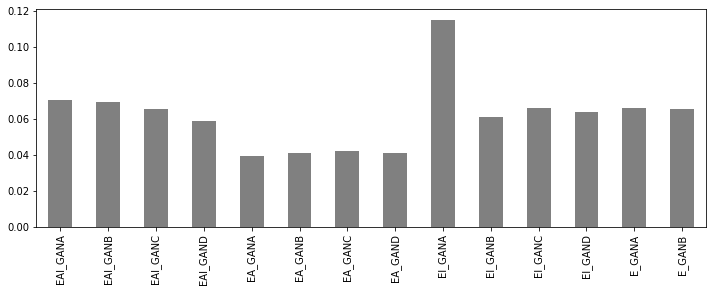

In [70]:
plt.subplots(figsize=(12,4))
(eur_metrics.T)['bhatt'].plot(kind='bar', color='gray')
plt.savefig('Eurecom/bhatt_0915.jpg', bbox_inches = "tight")

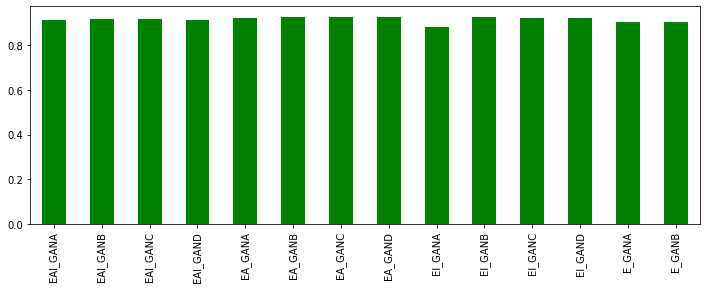

In [71]:
plt.subplots(figsize=(12,4))
(eur_metrics.T)['ssim'].plot(kind='bar', color='g')
plt.savefig('Eurecom/ssim_0915.jpg', bbox_inches = "tight")

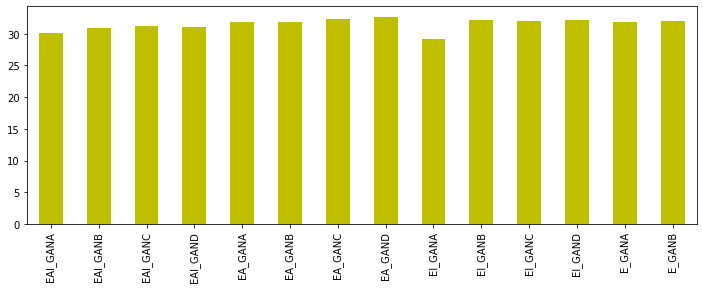

In [72]:
plt.subplots(figsize=(12,4))
(eur_metrics.T)['psnr'].plot(kind='bar', color='y')
plt.savefig('Eurecom/psnr_0915.jpg', bbox_inches = "tight")

In [73]:
eur_metrics_T_reset = ((eur_metrics.T).reset_index())
eur_metrics_T_reset = eur_metrics_T_reset.rename(columns={"index": "exp"})
eur_metrics_T_reset

,exp,bhatt,ssim,psnr,fid
0,EAI_GANA,0.070329,0.913913,30.085244,118.693629
1,EAI_GANB,0.069527,0.916568,30.866249,125.017033
2,EAI_GANC,0.065397,0.917005,31.184194,123.669328
3,EAI_GAND,0.058706,0.916135,31.047264,124.419902
4,EA_GANA,0.039246,0.924098,31.893156,83.135630
5,EA_GANB,0.040862,0.925907,31.875523,102.827299
6,EA_GANC,0.042024,0.928480,32.390927,102.751783
7,EA_GAND,0.041153,0.927698,32.677930,97.787874
8,EI_GANA,0.115000,0.882146,29.124283,81.194949
9,EI_GANB,0.060867,0.925557,32.195805,103.535732


In [74]:
eur_metrics_T_reset[0:4]

,exp,bhatt,ssim,psnr,fid
0,EAI_GANA,0.070329,0.913913,30.085244,118.693629
1,EAI_GANB,0.069527,0.916568,30.866249,125.017033
2,EAI_GANC,0.065397,0.917005,31.184194,123.669328
3,EAI_GAND,0.058706,0.916135,31.047264,124.419902


In [76]:
eur_metrics_T_reset[4:8]

,exp,bhatt,ssim,psnr,fid
4,EA_GANA,0.039246,0.924098,31.893156,83.135630
5,EA_GANB,0.040862,0.925907,31.875523,102.827299
6,EA_GANC,0.042024,0.928480,32.390927,102.751783
7,EA_GAND,0.041153,0.927698,32.677930,97.787874


In [77]:
eur_metrics_T_reset[8:12]

,exp,bhatt,ssim,psnr,fid
8,EI_GANA,0.115000,0.882146,29.124283,81.194949
9,EI_GANB,0.060867,0.925557,32.195805,103.535732
10,EI_GANC,0.065837,0.922176,31.945098,105.360569
11,EI_GAND,0.063928,0.924281,32.150326,108.878083


In [75]:
eur_metrics_T_reset[12:14]

,exp,bhatt,ssim,psnr,fid
12,E_GANA,0.06602,0.903670,31.813761,54.135152
13,E_GANB,0.06529,0.906361,32.047728,53.081867


In [78]:
def plot_multiple(metric, lims):
    # metric is like bhatt, no quotes needed
    # lims is a tuple like (10, 100)
    metric = str(metric)
    bottom, upper = lims

    plt.subplots(figsize=(3,2))
    g = sns.barplot(x="exp", y=metric, data=eur_metrics_T_reset[12:14])
    g.set_ylim(bottom, upper)
    for p in g.patches:
                 g.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                     textcoords='offset points')


    plt.subplots(figsize=(6,2))
    g = sns.barplot(x="exp", y=metric, data=eur_metrics_T_reset[0:4])
    g.set_ylim(bottom, upper)
    for p in g.patches:
                 g.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                     textcoords='offset points')

    plt.subplots(figsize=(6,2))
    g = sns.barplot(x="exp", y=metric, data=eur_metrics_T_reset[4:8])
    g.set_ylim(bottom, upper)
    for p in g.patches:
                 g.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                     textcoords='offset points')

    plt.subplots(figsize=(6,2))
    g = sns.barplot(x="exp", y=metric, data=eur_metrics_T_reset[8:12])
    g.set_ylim(bottom, upper)
    for p in g.patches:
                 g.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                     textcoords='offset points')



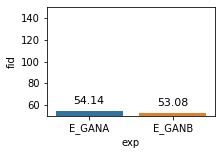

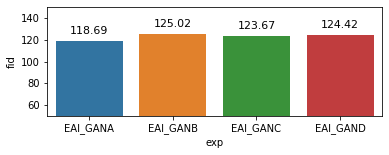

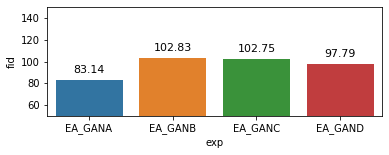

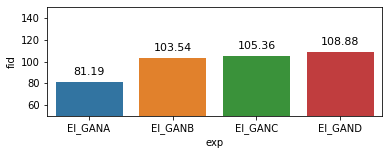

In [82]:
# FID

plot_multiple('fid', (50, 150))

So far we can see with FID, minus the GANE experiments, that 

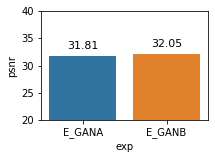

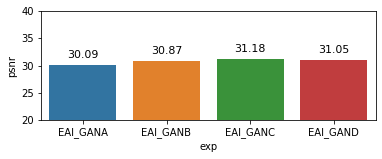

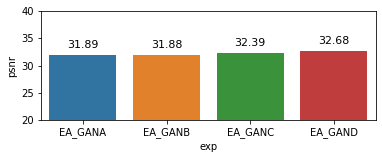

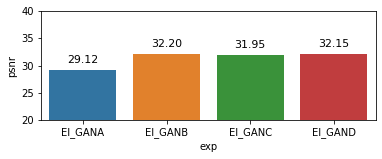

In [81]:
# PSNR

plot_multiple('psnr', (20, 40))

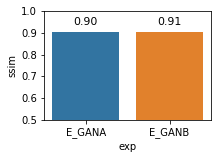

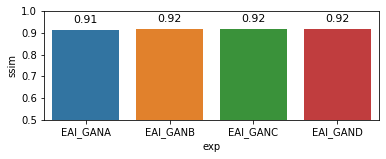

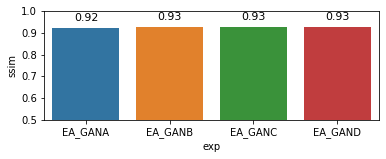

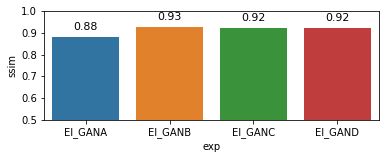

In [83]:
# SSIM

plot_multiple('ssim', (0.5, 1))

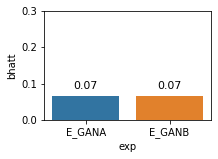

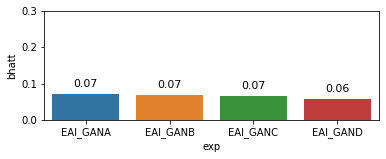

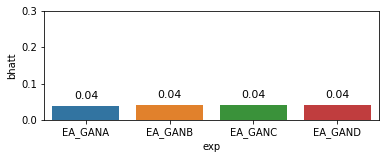

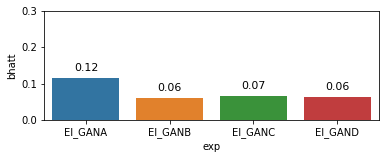

In [84]:
# Bhatt

plot_multiple('bhatt', (0, 0.3))

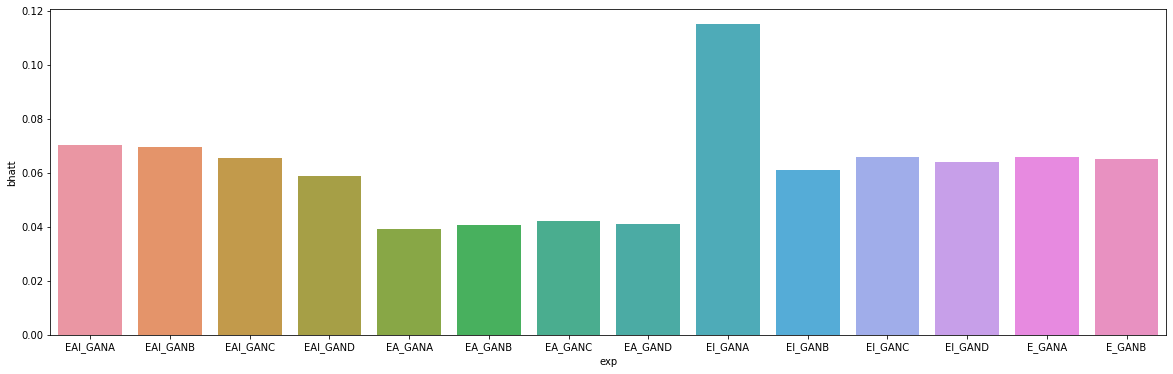

In [60]:
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='exp', y='bhatt', data=means, ax=ax)

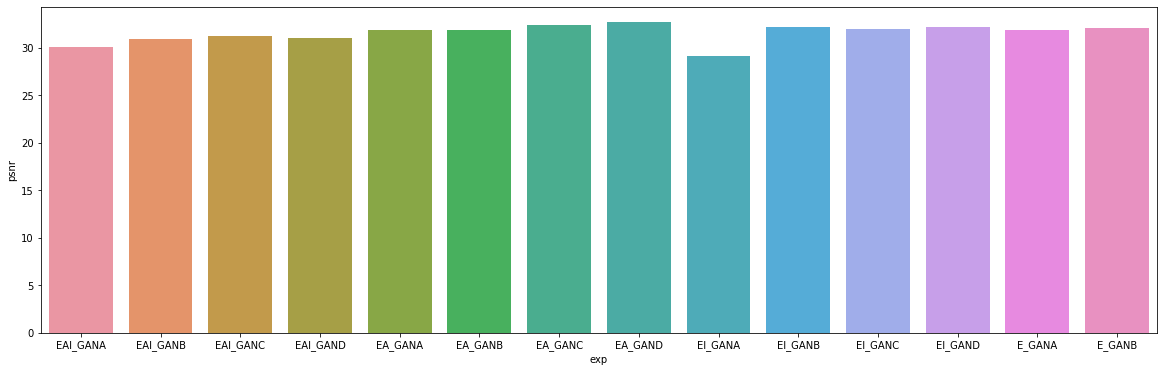

In [61]:
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='exp', y='psnr', data=means, ax=ax)

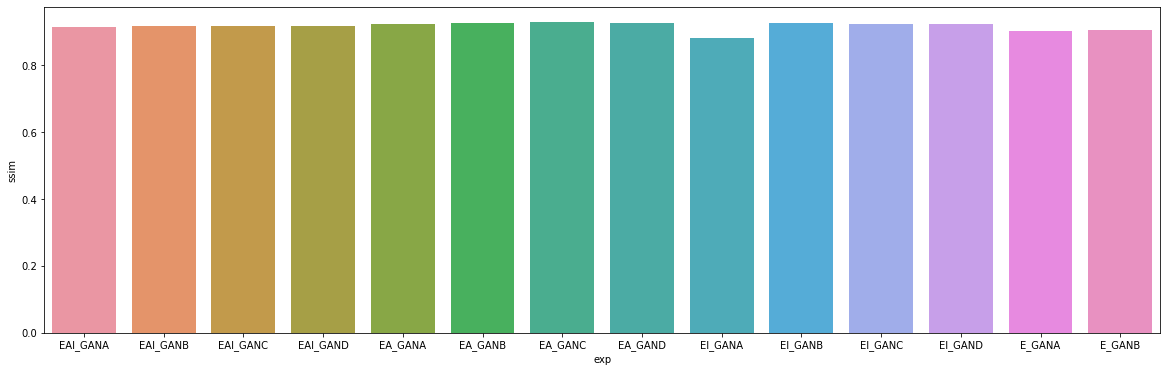

In [62]:
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='exp', y='ssim', data=means, ax=ax)

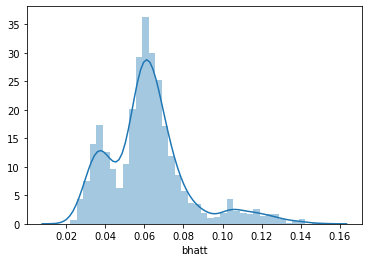

In [63]:
sns.distplot(final['bhatt'])

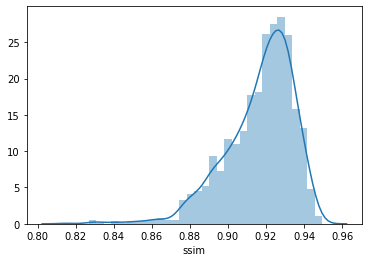

In [64]:
sns.distplot(final['ssim'])

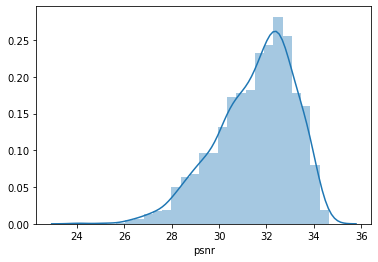

In [65]:
sns.distplot(final['psnr'])